In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Netflix.csv to Netflix.csv


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Netflix.csv")
#df.style.set_caption('Netflix Stock Prediction Analysis')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
# checking the shape
df.shape

(5044, 7)

In [ ]:
# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [ ]:
# Getting more info about data like count, mean, min, max.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [ ]:
# checking if any null values present in the data
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Cheking also for any duplicates values in the data
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

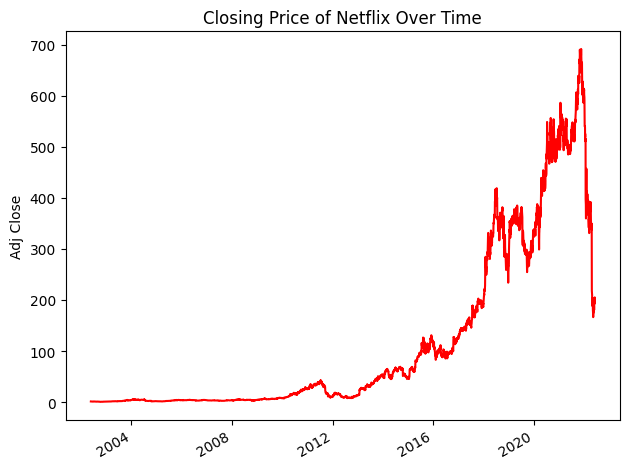

In [ ]:
# Plot for 'Adj Close' for Netflix with red color to match the Netflix logo
plt.subplot(1, 1, 1)
df['Adj Close'].plot(color='red')  # Netflix logo color
plt.ylabel('Adj Close', color='black')
plt.xlabel(None)
plt.title("Closing Price of Netflix Over Time", color='black')

# Adjust layout for make the plot more readable
plt.tight_layout()

# Display the plot
plt.show()


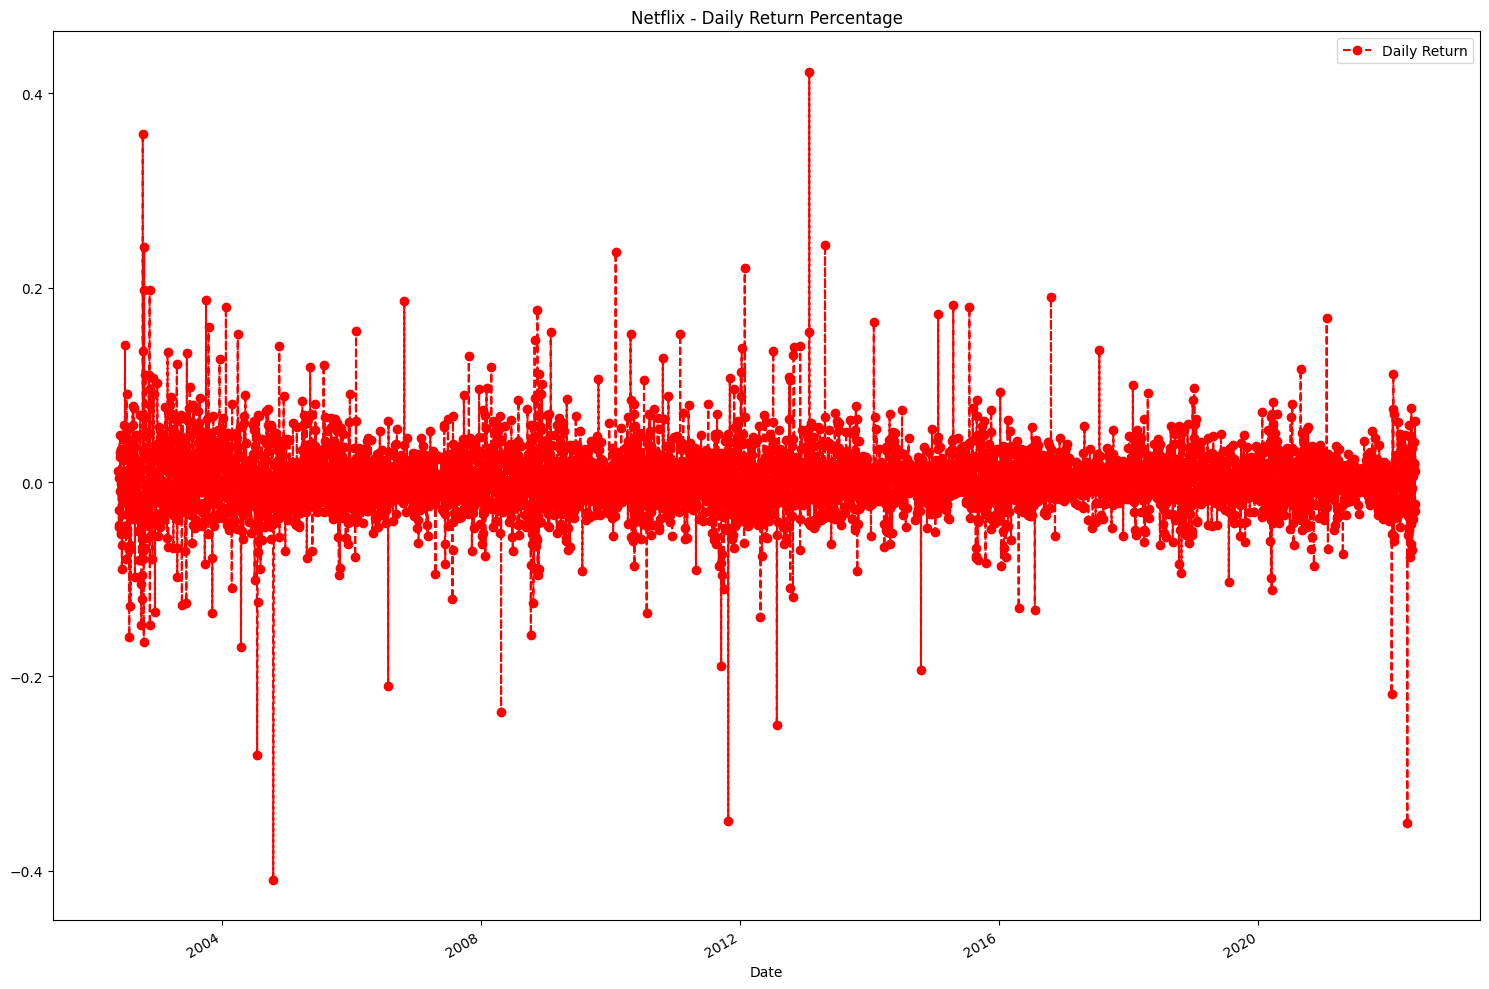

In [ ]:
import matplotlib.pyplot as plt

# Calculate the daily return percentage for Netflix
df['Daily Return'] = df['Adj Close'].pct_change()

# Plot the daily return percentage for Netflix
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot Netflix's Daily Return
df['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o', color='red')  # Use red for Netflix's branding
ax.set_title('Netflix - Daily Return Percentage', color='black')

# Adjust layout to make the plot more readable
fig.tight_layout()

# Display the plot
plt.show()


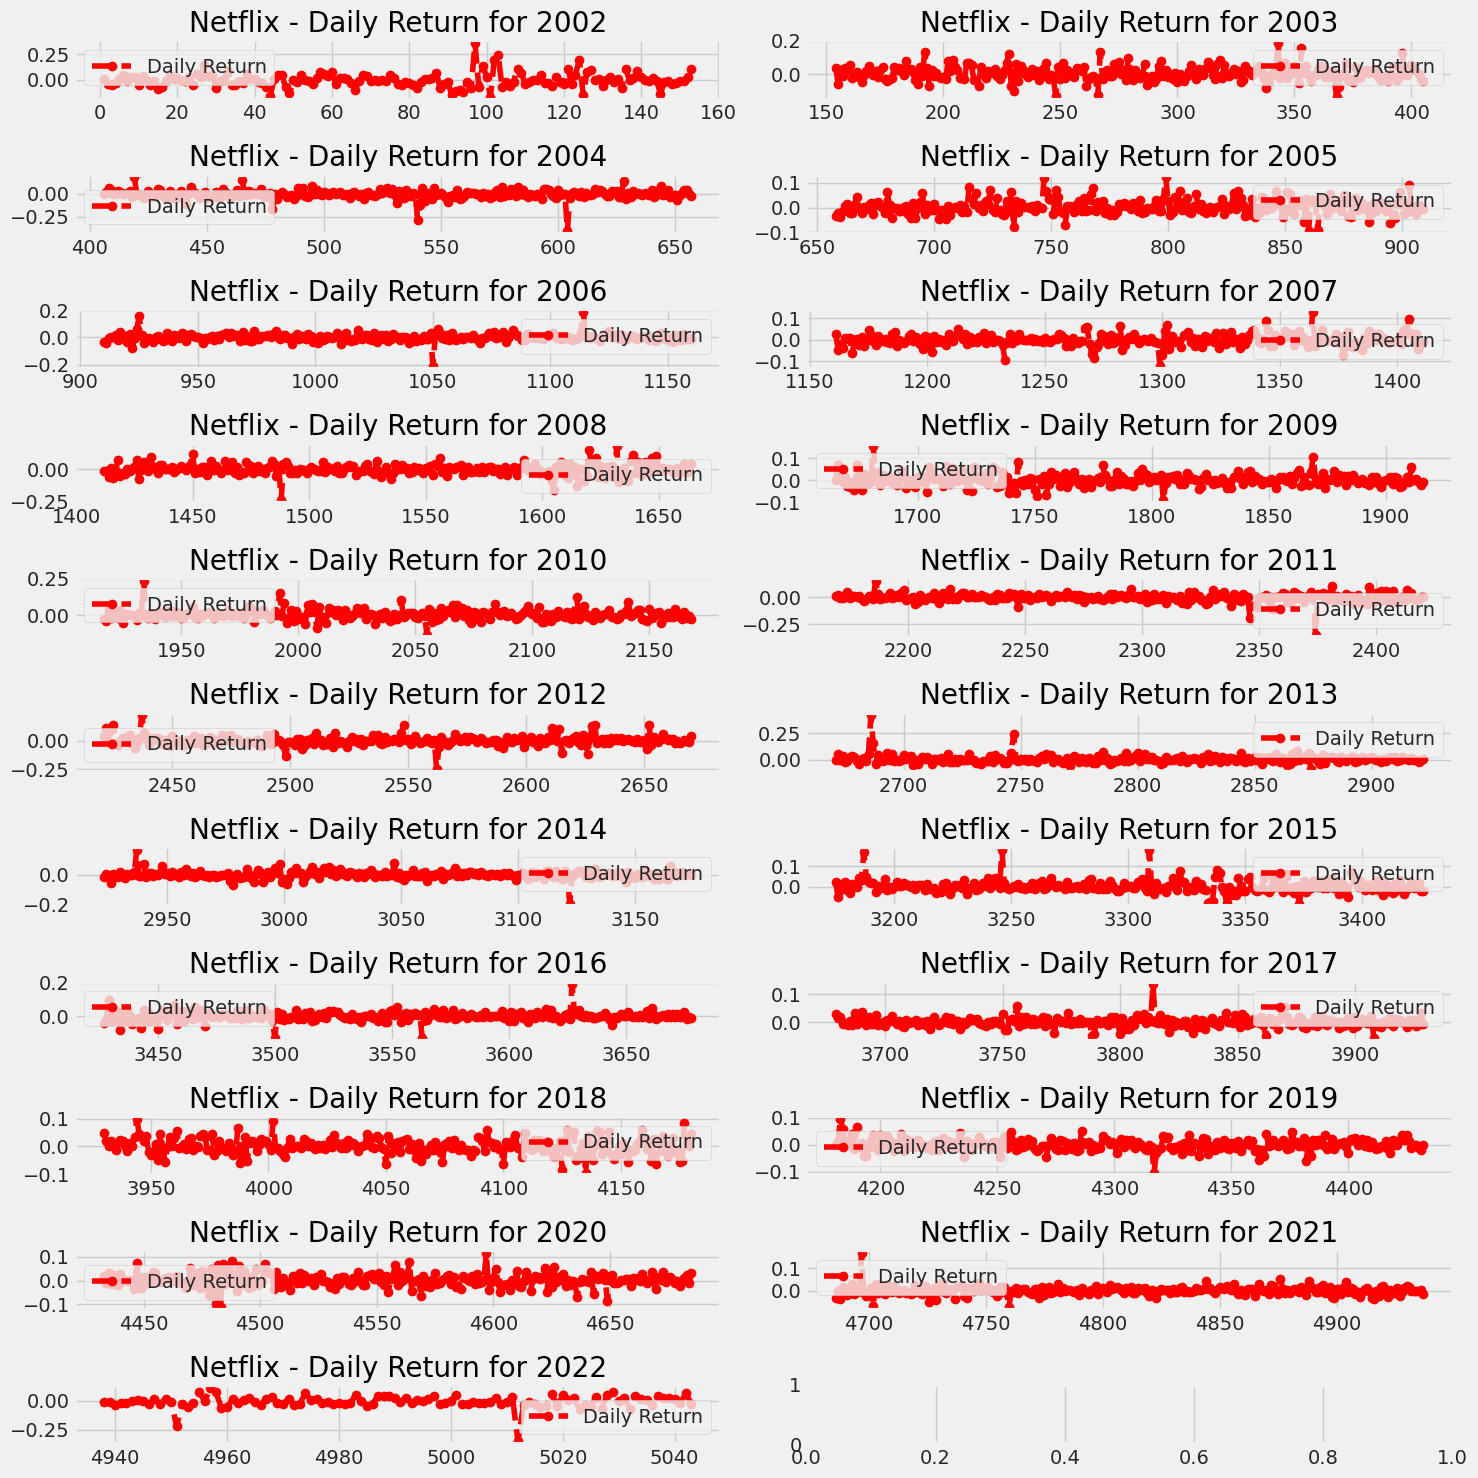

In [ ]:
# Convert 'Date' column to datetime format (if not already done)
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate the daily return for each day
df['Daily Return'] = df['Adj Close'].pct_change()

# Group by year and plot the daily return for each year
unique_years = df['Year'].unique()

# Create subplots to display each year's daily returns
fig, axes = plt.subplots(nrows=len(unique_years)//2 + len(unique_years)%2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

# Flatten axes for easier iteration
axes = axes.flatten()

for i, year in enumerate(unique_years):
    # Filter data for the year
    year_data = df[df['Year'] == year]

    # Plot the daily return for the year
    year_data['Daily Return'].plot(ax=axes[i], legend=True, linestyle='--', marker='o', color='red')
    axes[i].set_title(f'Netflix - Daily Return for {year}', color='black')

# Adjust layout to make the plot more readable
plt.tight_layout()

# Display the plot
plt.show()


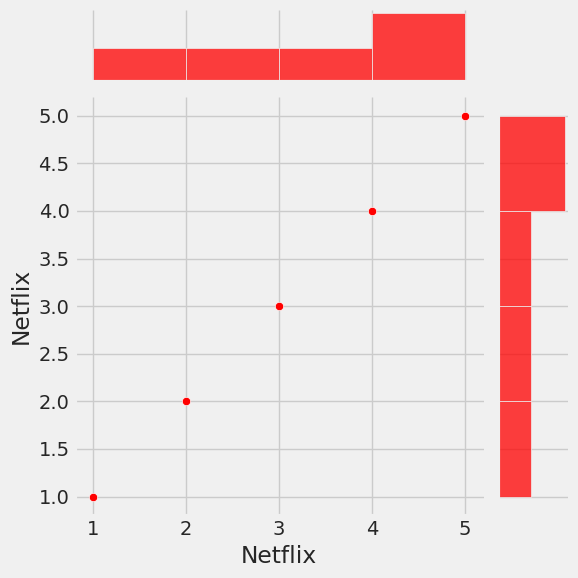

In [ ]:
# Assuming tech_rets is a DataFrame, create a sample DataFrame for demonstration
tech_rets = pd.DataFrame({'Netflix': [1, 2, 3, 4, 5]})

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='Netflix', y='Netflix', data=tech_rets, kind='scatter', color='red')
plt.show()

Text(0.5, 1.0, 'Correlation of stock closing price')

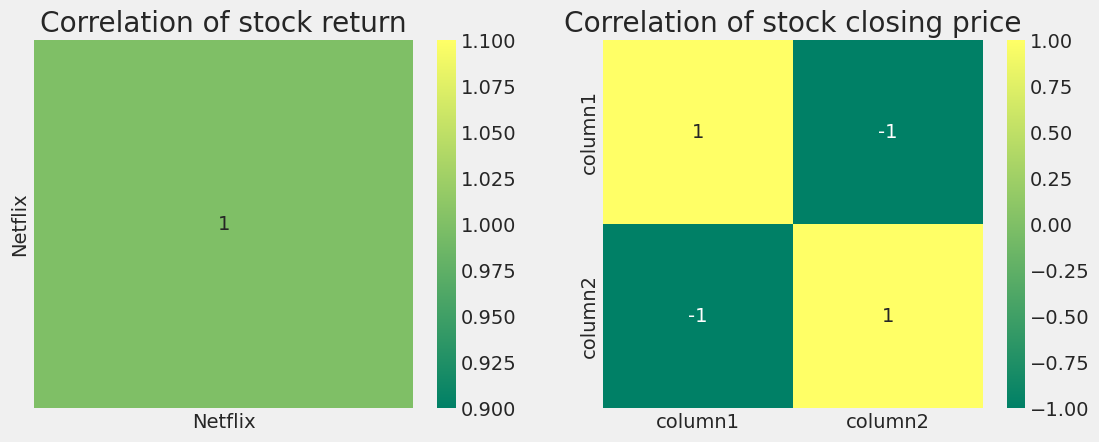

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

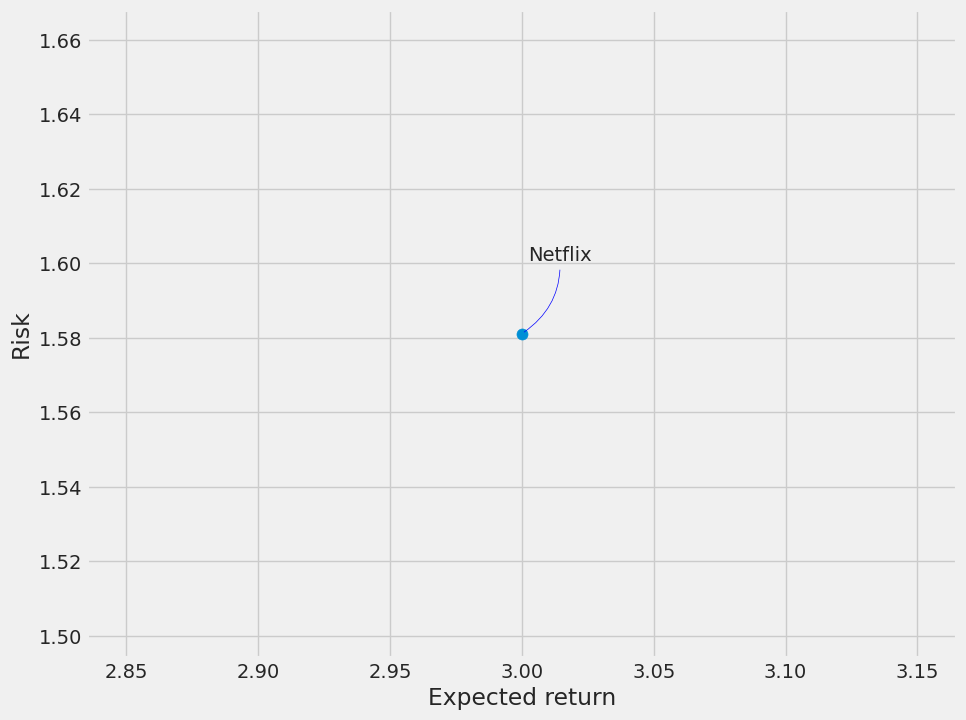

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4792

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.2785077 ],
       [0.29612623],
       [0.28728803]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.00085551, 0.00089064, 0.00082555,
       0.00090614, 0.00094747, 0.00115721, 0.00121714, 0.00130703,
       0.00116134, 0.00113965, 0.00114378, 0.0012967 , 0.00120784,
       0.00111382, 0.00109005, 0.00103632, 0.00112312, 0.00113861,
       0.00115411, 0.00111898, 0.00107249, 0.00095987, 0.00072119,
       0.00072842, 0.00078318, 0.00084001, 0.00075012, 0.00058584,
       0.00058171, 0.00056104, 0.00060857, 0.0006127 , 0.00059927,
       0.00055588, 0.00057861, 0.00066643, 0.00073772, 0.00078112])]
[0.0008813407918589954]

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



4732/4732 ━━━━━━━━━━━━━━━━━━━━ 240s 50ms/step - loss: 0.0018


In [ ]:
# new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# The models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


33.80643672615222

<ipython-input-97-d136017f9de9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



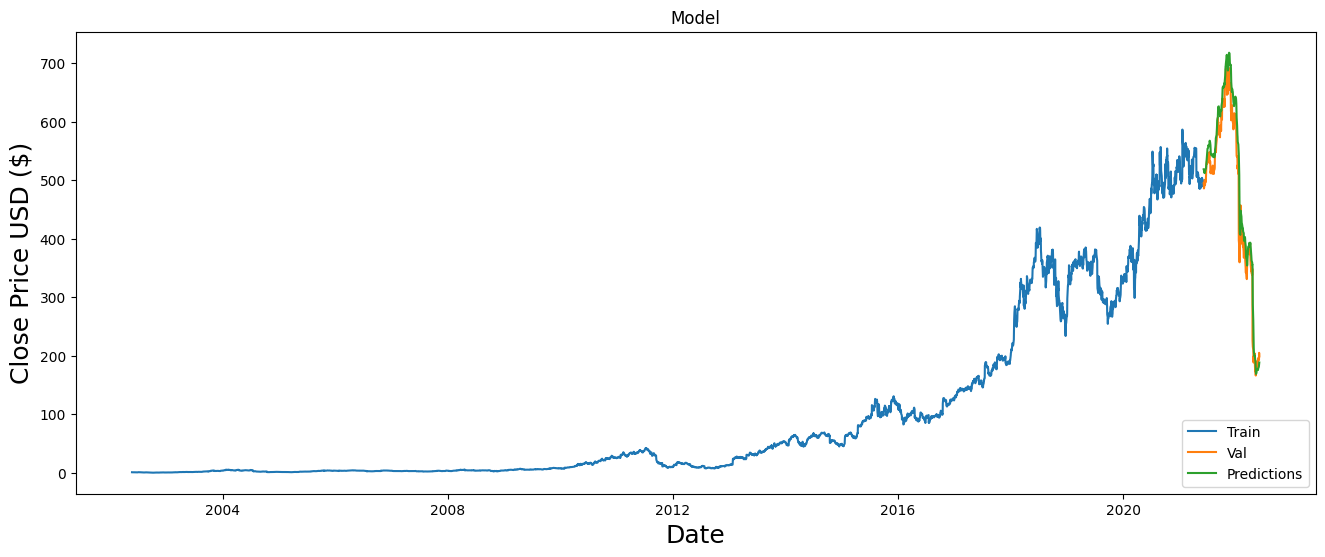

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close
Date,
2013-06-09,361.809998
2013-06-10,365.799988
2013-06-11,367.450012
2013-06-12,361.399994
2013-06-13,360.570007
...,...
2016-03-09,195.190002
2016-03-10,197.440002
2016-03-11,192.910004


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [ ]:
import plotly.express as px

# Use the Netflix stock data
stock_data = df.reset_index()  # Reset the index to access 'Date' as a column

# Create the line plot for Netflix's daily trading volume
fig = px.line(stock_data, x='Date', y='Volume', title='Daily Trading Volume - Netflix')

# Update the axis titles
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Volume')

# Use the dark theme layout
fig.update_layout(template='plotly_dark')

# Display the plot
fig.show()


In [ ]:
import plotly.graph_objects as go

# Use the Netflix stock data
stock_data = df.reset_index()  # Reset the index to access 'Date' as a column

# Create a figure
fig = go.Figure()

# Use the dark theme layout
fig.update_layout(template='plotly_dark')

# Add traces for Open, High, Low, and Close prices
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Open'], mode='lines+markers', name='Open'))
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['High'], mode='lines+markers', name='High'))
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Low'], mode='lines+markers', name='Low'))
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines+markers', name='Close'))

# Update the layout with titles
fig.update_layout(title='Netflix Stock Price Analysis',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)')

# Display the figure
fig.show()


In [ ]:
import plotly.express as px

# Use the Netflix stock data
stock_data = df.reset_index()  # Reset the index to access 'Date' as a column

# Calculate the daily price changes using the 'Close' prices
daily_changes = stock_data['Close'].diff()

# Create a histogram of the daily price changes
fig = px.histogram(daily_changes, nbins=50, title='Histogram of Daily Price Changes - Netflix')

# Update the axis titles
fig.update_xaxes(title='Daily Price Change (USD)')
fig.update_yaxes(title='Frequency')

# Use the dark theme layout
fig.update_layout(template='plotly_dark')

# Display the histogram
fig.show()


In [ ]:
import plotly.graph_objects as go

# Use the Netflix stock data
stock_data = df.reset_index()  # Reset the index to access 'Date' as a column

# Calculate the 20-day moving average using the 'Close' price
stock_data['20-day MA'] = stock_data['Close'].rolling(window=20).mean()

# Create the candlestick chart for Netflix stock
fig = go.Figure(data=[go.Candlestick(
    x=stock_data['Date'],
    open=stock_data['Open'],
    high=stock_data['High'],
    low=stock_data['Low'],
    close=stock_data['Close'],
    name="Candlesticks",
    increasing_line_color='green',
    decreasing_line_color='red',
    line=dict(width=1),
    showlegend=False
)])

# Add the 20-day moving average line to the chart
fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['20-day MA'],
                         mode='lines', name='20-day Moving Average',
                         line=dict(color='rgba(255, 255, 0, 0.9)')))  # Changed opacity for visibility

# Update layout with titles and theme
fig.update_layout(
    title="Netflix Stock Price Candlestick Chart with 20-day Moving Average",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    template="plotly_dark",
)

# Show the figure
fig.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'df' is your DataFrame and 'Adj Close' is your target feature (replace 'df' if your DataFrame has a different name)
adj_close_data = df['Adj Close'].values.reshape(-1, 1)

# Scaling the data (normalizing between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(adj_close_data)

# Define the sequence length (how many previous time steps you want to use for prediction)
sequence_length = 60  # 60 days look-back window for LSTM

# Create sequences of 60 time steps for training/testing
test_sequences = []
for i in range(sequence_length, len(scaled_data)):
    test_sequences.append(scaled_data[i-sequence_length:i])

# Convert to numpy array
test_sequences = np.array(test_sequences)

# Use the last sequence for prediction
last_seq = test_sequences[-1]  # Taking the last sequence from the test set
last_seq = last_seq.reshape((1, last_seq.shape[0], 1))  # Reshape for LSTM input

In [ ]:
from datetime import timedelta
import numpy as np
import pandas as pd

# Number of days to predict for (365 days each for 2023 and 2024)
days_to_predict = 365 * 2  # 730 days

latest_prediction = []

# Assuming you have multiple features (e.g., Open, High, Low, Volume, Close)
# Ensure last_seq is reshaped correctly for the LSTM input (batch_size=1, sequence_length, num_features)
last_seq = last_seq.reshape((1, last_seq.shape[1], last_seq.shape[2]))

for _ in range(days_to_predict):
    # Predict the next value(s) based on the last sequence
    prediction = model.predict(last_seq)

    # Append the predicted values (for all features) to the list
    latest_prediction.append(prediction[0])  # Assuming prediction[0] contains predictions for all features

    # Reshape the prediction to match the sequence shape for appending (batch_size=1, 1, num_features)
    prediction_reshaped = np.reshape(prediction, (1, 1, last_seq.shape[2]))

    # Create a new sequence by removing the first time step and adding the new predicted values at the end
    new_seq = np.append(last_seq[:, 1:, :], prediction_reshaped, axis=1)

    # Update last_seq for the next iteration
    last_seq = new_seq

# Convert predictions to numpy array
latest_prediction = np.array(latest_prediction)

# Assuming `scaler` is the MinMaxScaler that was fitted on the multivariate data
latest_prediction = scaler.inverse_transform(latest_prediction)

# Extract the last date from the dataset
last_date = pd.to_datetime(netflix_data['Date']).max()

# plot for next 730 dates (for 2023 and 2024)
next_dates = [last_date + timedelta(days=i) for i in range(1, days_to_predict + 1)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Dummy data for illustration purposes (replace with your actual prediction data)
# Example setup (replace with actual prediction data)
next_dates = pd.date_range(start='2023-01-01', periods=24, freq='M')  # Example of monthly dates for 2023-2024
latest_prediction_volume = np.random.uniform(1000000, 5000000, (24, 1))  # Random predicted values for Volume

# Netflix-themed colors
background_color = '#141414'  # Netflix black
text_color = '#E50914'        # Netflix red
line_color = '#00A8E1'        # Light blue line for volume
marker_color = '#F5C518'      # Gold markers

# Plot for Predicted 'Volume' Prices
fig_volume = go.Figure()

fig_volume.add_trace(go.Scatter(
    x=next_dates,
    y=latest_prediction_volume[:, 0],
    mode='lines+markers',
    name='Predicted Volume',
    line=dict(color=line_color, width=3),
    marker=dict(color=marker_color, size=8, symbol='circle')
))

# Update layout for a more professional look
fig_volume.update_layout(
    title={
        'text': 'Predicted Volume for 2023 and 2024',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(color=text_color, size=20)
    },
    xaxis_title='Date',
    yaxis_title='Volume',
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.2)',
        color='white',
        title_font=dict(size=14, color='white'),
        tickfont=dict(size=12, color='white')
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.2)',
        color='white',
        title_font=dict(size=14, color='white'),
        tickfont=dict(size=12, color='white')
    ),
    plot_bgcolor=background_color,  # Plot area background
    paper_bgcolor=background_color,  # Overall figure background
    font=dict(color='white')  # Default text color
)

# Show the figure for 'Volume' predictions
fig_volume.show()


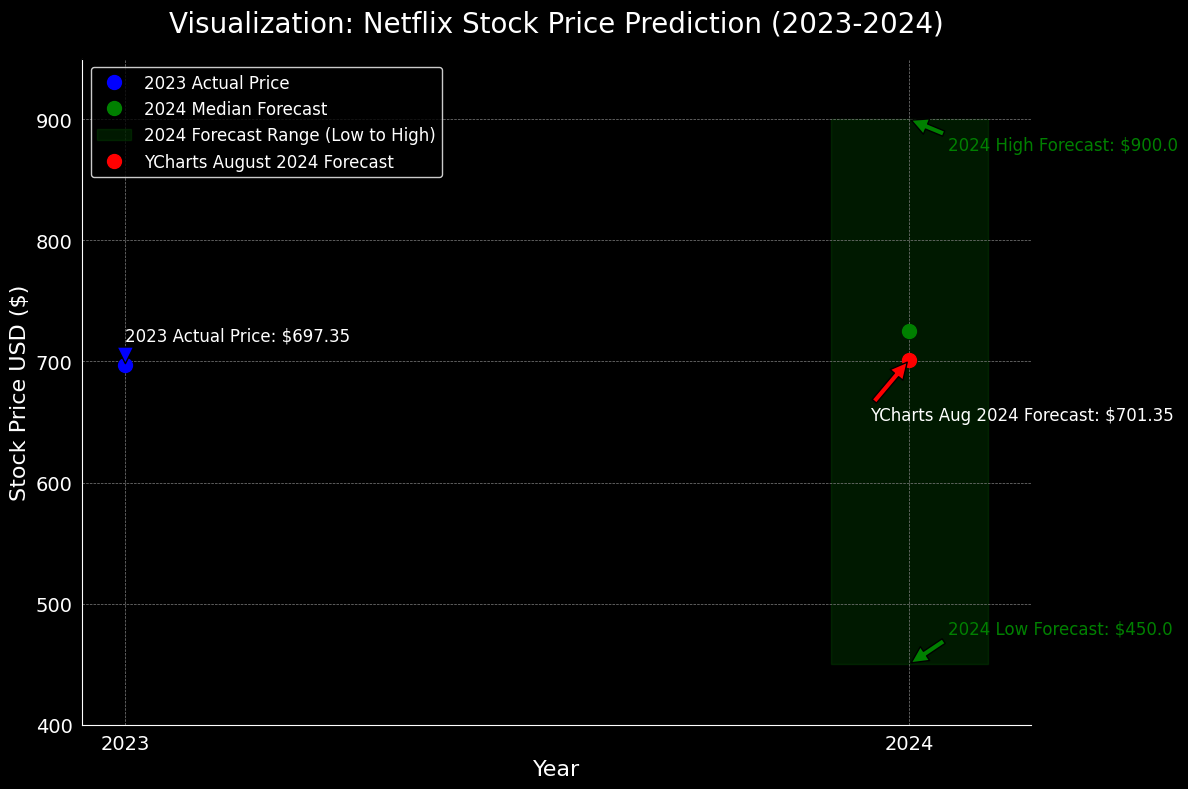

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for 2023 and 2024
years = np.array([2023, 2024])

# Actual price in 2023
current_price_2023 = 697.35  # Current price in 2023

# Forecasted prices for 2024
predicted_mid_2024 = 725.00  # Median or average forecast
predicted_high_2024 = 900.00  # High forecast
predicted_low_2024 = 450.00   # Low forecast
predicted_mid_aug_2024 = 701.35  # YCharts August 2024 forecast

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the actual price for 2023
plt.plot(years[0], current_price_2023, 'bo', label='2023 Actual Price', markersize=10)

# Plot predicted mid price for 2024
plt.plot(years[1], predicted_mid_2024, 'go', label='2024 Median Forecast', markersize=10)

# Plot high and low forecasts for 2024 using shaded area
plt.fill_between([2023.9, 2024.1], predicted_low_2024, predicted_high_2024, color='green', alpha=0.2,
                 label='2024 Forecast Range (Low to High)')

# Plot YCharts August forecast for 2024
plt.plot(years[1], predicted_mid_aug_2024, 'ro', label='YCharts August 2024 Forecast', markersize=10)

# Annotate important points
plt.annotate(f'2023 Actual Price: ${current_price_2023}', xy=(2023, current_price_2023), xytext=(2023, current_price_2023 + 20),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='white')

plt.annotate(f'YCharts Aug 2024 Forecast: ${predicted_mid_aug_2024}', xy=(2024, predicted_mid_aug_2024),
             xytext=(2023.95, predicted_mid_aug_2024 - 50), arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='white')

plt.annotate(f'2024 High Forecast: ${predicted_high_2024}', xy=(2024, predicted_high_2024),
             xytext=(2024.05, predicted_high_2024 - 25), arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

plt.annotate(f'2024 Low Forecast: ${predicted_low_2024}', xy=(2024, predicted_low_2024),
             xytext=(2024.05, predicted_low_2024 + 25), arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

# Customize the plot for a professional appearance
plt.title('Visualization: Netflix Stock Price Prediction (2023-2024)', fontsize=20, color='white', pad=20)
plt.xlabel('Year', fontsize=16, color='white')
plt.ylabel('Stock Price USD ($)', fontsize=16, color='white')
plt.xticks(years, ['2023', '2024'], fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')

# Add gridlines and customize their color
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Set background and frame colors for dark theme
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Set the y-axis limits for better visualization
plt.ylim(400, 950)

# Show legend with a professional layout
plt.legend(loc='upper left', fontsize=12, facecolor='black', edgecolor='white', labelcolor='white')

# Show the plot
plt.tight_layout()
plt.show()


#####LSTM Model Build

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Load the Netflix stock price data (replace 'netflix.csv' with the actual file name)
netflix_data = pd.read_csv('Netflix.csv')

# Preprocess and Scale the Data
data = netflix_data[['Adj Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Split into training and test data
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

In [ ]:
# Function to create dataset for LSTM
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [ ]:
# Time step
time_step = 60

In [ ]:
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshape input to [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model with optimizations
model = Sequential()

In [ ]:
# Layer 1: First LSTM layer with 100 units and dropout to prevent overfitting
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout rate set to 20%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Layer 2: Second LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))  # Adding dropout to this layer as well

In [ ]:
# Dense layer
model.add(Dense(units=50))

In [ ]:
# Output layer: Single neuron to predict the next value
model.add(Dense(units=1))

In [ ]:
# Compile the model with Adam optimizer and learning rate set to 0.001
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model with optimized batch size and number of epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - loss: 1.2379e-04 - val_loss: 0.0024
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - loss: 8.8104e-05 - val_loss: 0.0012
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 1.0804e-04 - val_loss: 0.0057
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - loss: 1.2228e-04 - val_loss: 0.0053
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - loss: 1.0120e-04 - val_loss: 0.0012
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 1.0505e-04 - val_loss: 0.0010
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - loss: 7.5975e-05 - val_loss: 0.0011
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - loss: 7.5173e-05 - val_loss: 0.0028
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - loss: 7.0687e-05 - val_loss: 8.7156e-04
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 8.4793e-05 - val

In [ ]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [ ]:
# Inverse transform the predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

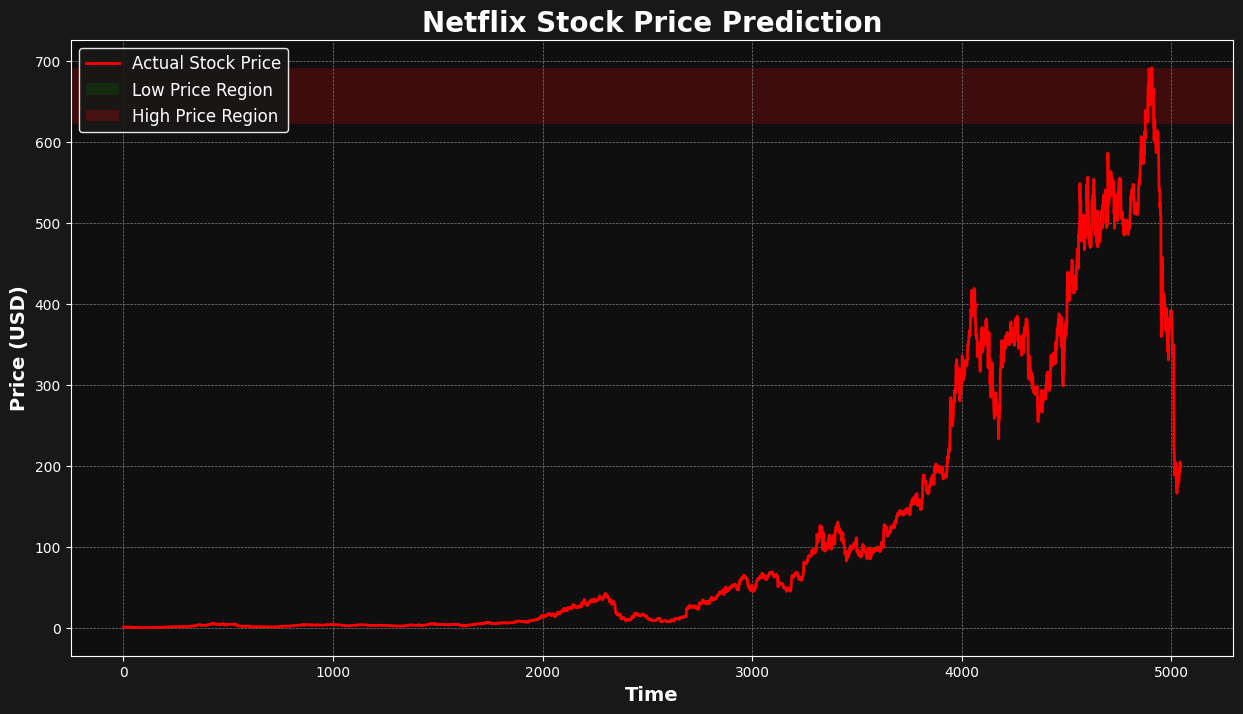

In [ ]:
import matplotlib.pyplot as plt

# Visualization of results
plt.figure(figsize=(15, 8))

# Plot the actual stock prices
plt.plot(data, label='Actual Stock Price', color='red', linewidth=2)

# Set the title and axis labels
plt.title('Netflix Stock Price Prediction', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Time', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Price (USD)', fontsize=14, fontweight='bold', color='white')

# Customize the background and grid
plt.gca().set_facecolor('#0f0f0f')  # Set the plot background to dark (Netflix-like theme)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Customize the figure background color (outside the plot)
plt.gcf().set_facecolor('#181818')

# Add a color band background to distinguish different price regions
# Extract the first column of the data array to get a 1D array
data_1d = data[:, 0]
plt.axhspan(min(data_1d), min(data_1d)*1.1, facecolor='green', alpha=0.2, label='Low Price Region')
plt.axhspan(max(data_1d)*0.9, max(data_1d), facecolor='red', alpha=0.2, label='High Price Region')

# Add the legend and customize it
plt.legend(loc='upper left', fontsize=12, facecolor='#181818', edgecolor='white', framealpha=0.9, fancybox=True)

# Show the plot
plt.show()

In [ ]:
# Shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict

In [ ]:
# Shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2):len(data), :] = test_predict

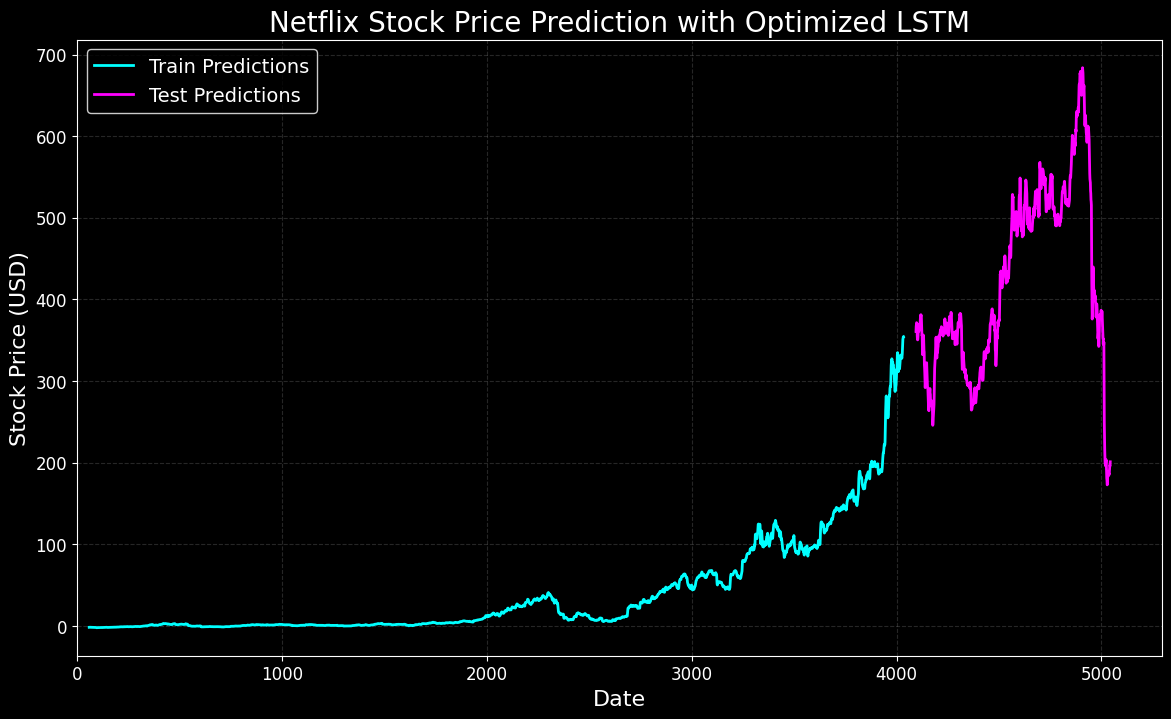

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a gradient background
def add_gradient(ax, color1, color2):
    ax.set_facecolor(color1)
    ax_background = ax.imshow(np.array([[0,1]]), cmap='Reds', interpolation='bicubic',
                              extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]],
                              aspect='auto', zorder=-1)
    ax_background.set_alpha(0.2)  # Adjust the opacity for a subtle effect

# Plot the predictions
plt.figure(figsize=(14, 8))

# Add gradient background for professional Netflix-like aesthetic
ax = plt.gca()
add_gradient(ax, 'black', 'red')

# Plot the train and test predictions
plt.plot(train_predict_plot, label='Train Predictions', color='cyan', linewidth=2)
plt.plot(test_predict_plot, label='Test Predictions', color='magenta', linewidth=2)

# Add titles and labels with Netflix-themed font size and color
plt.title('Netflix Stock Price Prediction with Optimized LSTM', fontsize=20, color='white')
plt.xlabel('Date', fontsize=16, color='white')
plt.ylabel('Stock Price (USD)', fontsize=16, color='white')

# Customize tick colors to match the theme
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

# Add a legend with custom styling
plt.legend(fontsize=14, facecolor='black', edgecolor='white', loc='upper left')

# Set grid with a subtle color
plt.grid(True, linestyle='--', color='gray', alpha=0.3)

# Show the plot
plt.show()


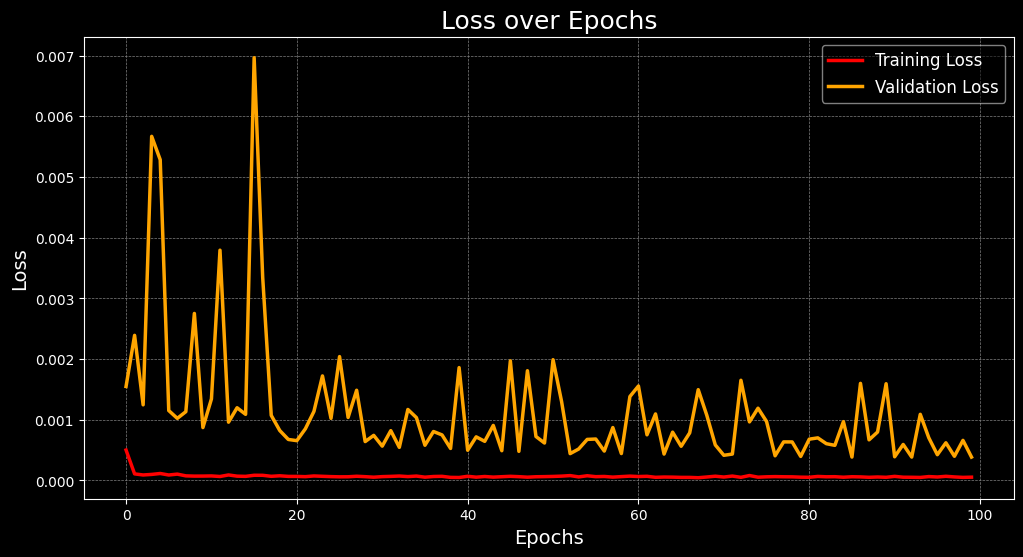

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure with a dark background
plt.figure(figsize=(12,6))
plt.style.use('dark_background')  # Use dark background

# Plot the training and validation loss with custom colors
plt.plot(history.history['loss'], label='Training Loss', color='red', linewidth=2.5)  # Red for training loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2.5)  # Orange for validation loss

# Add titles and labels with custom styling
plt.title('Loss over Epochs', fontsize=18, color='white')
plt.xlabel('Epochs', fontsize=14, color='white')
plt.ylabel('Loss', fontsize=14, color='white')

# Add a legend with custom styling
plt.legend(loc='upper right', fontsize=12, facecolor='black', edgecolor='white', framealpha=0.5)

# Customize the grid and axes for better visibility
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('black')  # Set axis background color to black
plt.xticks(color='white')  # Set x-axis ticks color to white
plt.yticks(color='white')  # Set y-axis ticks color to white

# Show the final plot
plt.show()


####Linear Regression

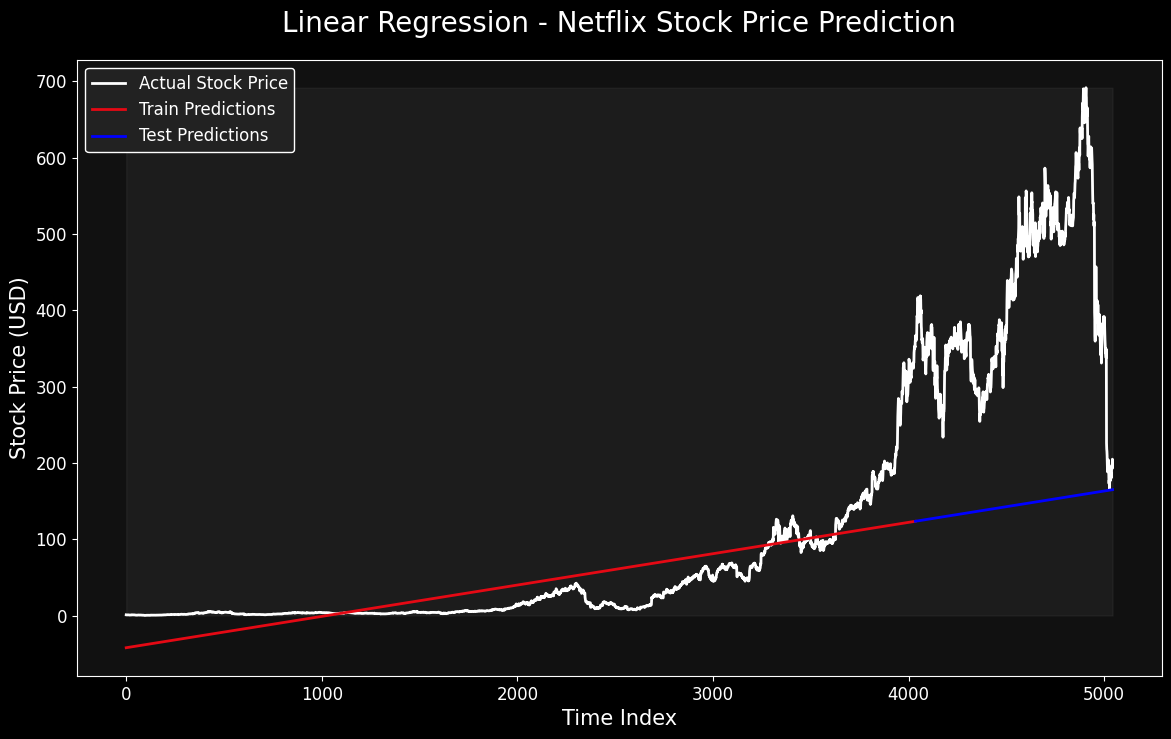

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = np.arange(len(netflix_data)).reshape(-1, 1)  # Time index as feature
y = netflix_data['Adj Close'].values  # Stock price

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Add a background gradient (from red to black to resemble Netflix brand colors)
ax.set_facecolor('#111111')  # Set to black
ax.grid(False)  # Turn off the grid to create a cleaner look

# the actual stock price line
ax.plot(y, label='Actual Stock Price', color='white', linewidth=2)

# the train predictions line
ax.plot(np.arange(len(y_pred_train)), y_pred_train, label='Train Predictions', color='#e50914', linewidth=2)

# the test predictions line
ax.plot(np.arange(len(y_pred_train), len(y_pred_train) + len(y_pred_test)), y_pred_test, label='Test Predictions', color='blue', linewidth=2)

# Title and labels
ax.set_title('Linear Regression - Netflix Stock Price Prediction', fontsize=20, color='white', pad=20)
ax.set_xlabel('Time Index', fontsize=15, color='white')
ax.set_ylabel('Stock Price (USD)', fontsize=15, color='white')

# ticks and borders
ax.tick_params(colors='white', labelsize=12)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# The legend with customized fonts and colors
ax.legend(facecolor='#222222', edgecolor='white', fontsize=12, loc='best', framealpha=1)

# subtle horizontal shading for professional visual effect
ax.fill_between(np.arange(len(y_pred_train) + len(y_pred_test)), y.min(), y.max(), color='gray', alpha=0.1)

# Show the plot
plt.show()


####Random Forest

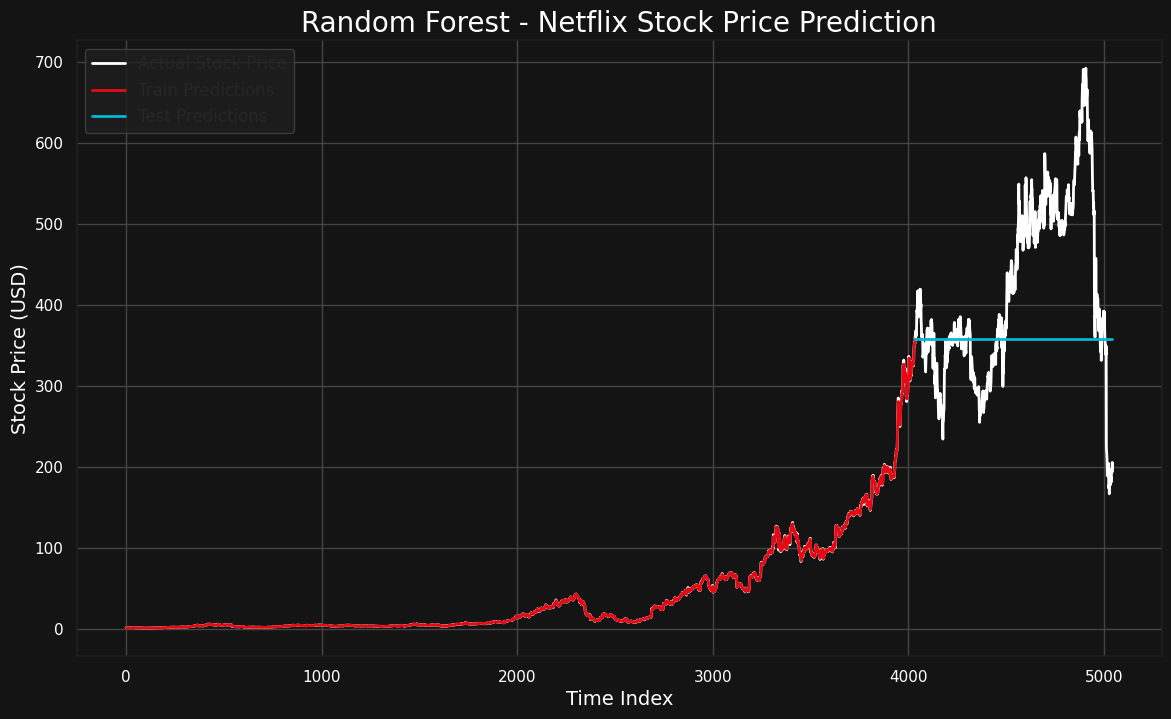

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Set a Netflix-inspired color palette
sns.set(style="darkgrid", rc={"axes.facecolor": "#141414", "axes.edgecolor": "#1f1f1f",
                              "axes.labelcolor": "white", "xtick.color": "white", "ytick.color": "white",
                              "grid.color": "#444444", "figure.facecolor": "#141414"})

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Visualize the results with Netflix-themed colors
plt.figure(figsize=(14, 8))

# Plot actual stock prices
plt.plot(y, label='Actual Stock Price', color='white', linewidth=2)

# Plot train predictions in Netflix red
plt.plot(np.arange(len(y_pred_train_rf)), y_pred_train_rf, label='Train Predictions', color='#e50914', linewidth=2)

# Plot test predictions in blue (or a complementary color)
plt.plot(np.arange(len(y_pred_train_rf), len(y_pred_train_rf) + len(y_pred_test_rf)),
         y_pred_test_rf, label='Test Predictions', color='#00b8d4', linewidth=2)

# Set the background to match Netflix’s brand
plt.gca().set_facecolor('#141414')
plt.title('Random Forest - Netflix Stock Price Prediction', fontsize=20, color='white')
plt.xlabel('Time Index', fontsize=14, color='white')
plt.ylabel('Stock Price (USD)', fontsize=14, color='white')

# Update legend and other styling
plt.legend(loc='upper left', fontsize=12, frameon=True, facecolor='#1f1f1f', edgecolor='#444444')
plt.grid(color='#444444')
plt.show()


####SVM

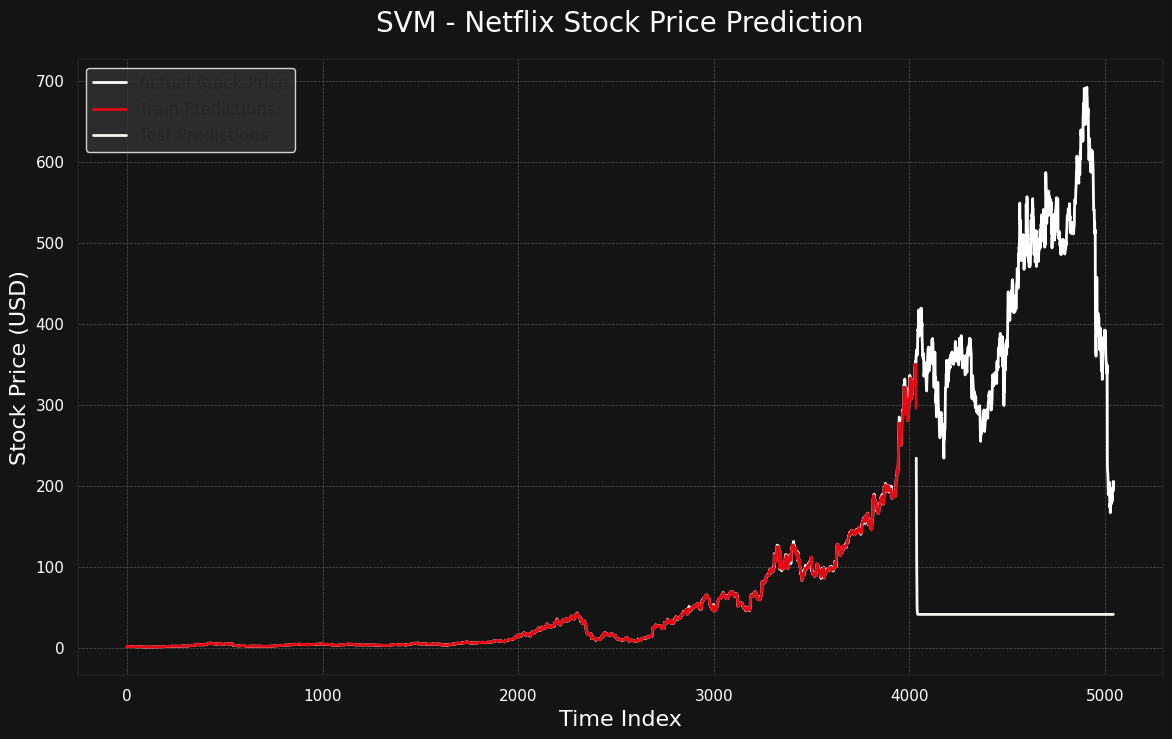

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# Train an SVR model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train, y_train)

# Predict
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Visualization
plt.figure(figsize=(14, 8))

# Set background color to a gradient close to the Netflix theme
ax = plt.gca()
ax.set_facecolor('#141414')  # Netflix dark background

# Plot actual and predicted stock prices
plt.plot(y, label='Actual Stock Price', color='white', linewidth=2)
plt.plot(np.arange(len(y_pred_train_svm)), y_pred_train_svm, label='Train Predictions', color='#E50914', linewidth=2)
plt.plot(np.arange(len(y_pred_train_svm), len(y_pred_train_svm) + len(y_pred_test_svm)), y_pred_test_svm, label='Test Predictions', color='#f5f5f1', linewidth=2)

# Customize title, labels, and legend
plt.title('SVM - Netflix Stock Price Prediction', fontsize=20, color='white', pad=20)
plt.xlabel('Time Index', fontsize=16, color='white')
plt.ylabel('Stock Price (USD)', fontsize=16, color='white')
plt.legend(facecolor='#333333', fontsize=12, edgecolor='white', loc='upper left')

# gridlines with custom colors
plt.grid(color='#555555', linestyle='--', linewidth=0.5)

# Set tick colors to match the Netflix theme
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Show plot
plt.show()


####XGBOOST

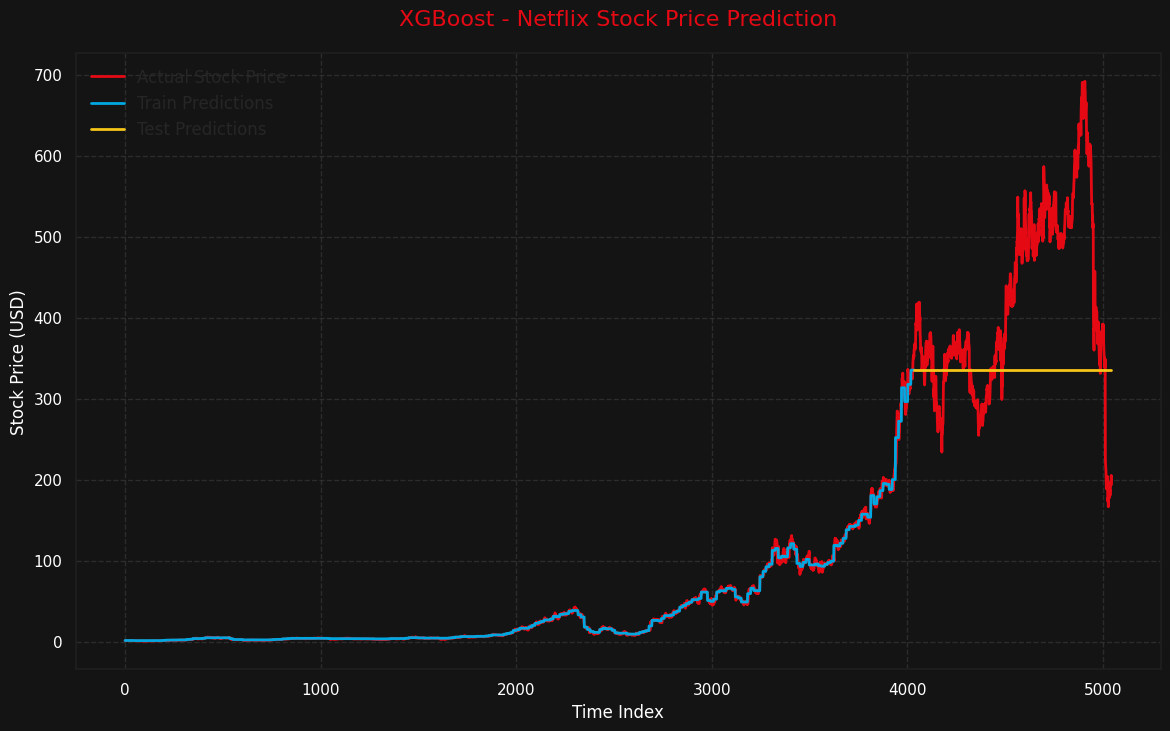

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Set up Netflix-themed color palette
background_color = '#141414'  # Netflix black
text_color = '#E50914'        # Netflix red
train_color = '#00A8E1'       # Light blue for training predictions
test_color = '#F5C518'        # Golden yellow for test predictions

# Visualize the results with enhanced style
plt.figure(figsize=(14, 8), facecolor=background_color)
plt.plot(y, label='Actual Stock Price', color=text_color, linewidth=2)
plt.plot(np.arange(len(y_pred_train_xgb)), y_pred_train_xgb, label='Train Predictions', color=train_color, linewidth=2)
plt.plot(np.arange(len(y_pred_train_xgb), len(y_pred_train_xgb) + len(y_pred_test_xgb)),
         y_pred_test_xgb, label='Test Predictions', color=test_color, linewidth=2)

# Title and labels
plt.title('XGBoost - Netflix Stock Price Prediction', fontsize=16, color=text_color, pad=20)
plt.xlabel('Time Index', fontsize=12, color='white')
plt.ylabel('Stock Price (USD)', fontsize=12, color='white')

# Customize plot aesthetics
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=False, facecolor=background_color)
plt.xticks(color='white')
plt.yticks(color='white')

# Set background color for the plot
plt.gca().set_facecolor(background_color)

# Show the plot
plt.show()


In [ ]:
pip install plotly

In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.1 MB/s eta 0:00:00


In [ ]:
pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 1.1 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import dash_bootstrap_components as dbc

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.SLATE])


next_dates = pd.date_range(start='2023-01-01', periods=24, freq='M')
latest_prediction_adj_close = np.random.uniform(300, 600, (24, 1))
latest_prediction_volume = np.random.uniform(1000000, 5000000, (24, 1))

# Layout for the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Netflix Stock Prediction Dashboard", style={'color': '#E50914', 'textAlign': 'center'}), width=12)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='candlestick-chart'),
            dcc.Interval(id='interval-component', interval=1*1000, n_intervals=0)
        ], width=12)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='predicted-volume')
        ], width=6),
        dbc.Col([
            dcc.Graph(id='moving-average')
        ], width=6),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            html.Label('Select Stock Attribute:'),
            dcc.Dropdown(
                id='attribute-dropdown',
                options=[
                    {'label': 'Open', 'value': 'open'},
                    {'label': 'High', 'value': 'high'},
                    {'label': 'Low', 'value': 'low'},
                    {'label': 'Close', 'value': 'close'}
                ],
                value='close',
                style={'color': 'black'}
            )
        ], width=4)
    ], className="mb-4")
], fluid=True, style={'backgroundColor': '#141414'})


# Callback to update candlestick chart
@app.callback(
    Output('candlestick-chart', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_candlestick_chart(n):
    # Dummy data for candlestick chart (replace with actual data)
    dates = pd.date_range(start='2022-01-01', periods=100)
    open_price = np.random.uniform(300, 500, 100)
    high_price = np.random.uniform(500, 600, 100)
    low_price = np.random.uniform(200, 300, 100)
    close_price = np.random.uniform(300, 600, 100)

    fig = go.Figure(data=[go.Candlestick(
        x=dates,
        open=open_price,
        high=high_price,
        low=low_price,
        close=close_price,
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlestick'
    )])

    fig.update_layout(
        title='Netflix Stock Candlestick Chart',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        template='plotly_dark',
        plot_bgcolor='#141414',
        paper_bgcolor='#141414',
        font=dict(color='white')
    )
    return fig

# Callback to update predicted volume chart
@app.callback(
    Output('predicted-volume', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_volume_chart(n):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=next_dates,
        y=latest_prediction_volume[:, 0],
        mode='lines+markers',
        name='Predicted Volume',
        line=dict(color='#00A8E1', width=3),
        marker=dict(color='#F5C518', size=8)
    ))

    fig.update_layout(
        title='Predicted Volume for 2023 and 2024',
        xaxis_title='Date',
        yaxis_title='Volume',
        template='plotly_dark',
        plot_bgcolor='#141414',
        paper_bgcolor='#141414',
        font=dict(color='white')
    )
    return fig

# Callback to update moving average chart
@app.callback(
    Output('moving-average', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_moving_average_chart(n):
    # Dummy moving average (replace with actual data)
    dates = pd.date_range(start='2022-01-01', periods=100)
    close_price = np.random.uniform(300, 600, 100)
    moving_average = pd.Series(close_price).rolling(window=20).mean()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=dates,
        y=close_price,
        mode='lines',
        name='Close Price',
        line=dict(color='#E50914', width=2)
    ))

    fig.add_trace(go.Scatter(
        x=dates,
        y=moving_average,
        mode='lines',
        name='20-day Moving Average',
        line=dict(color='#F5C518', width=2, dash='dash')
    ))

    fig.update_layout(
        title='Netflix Stock Price with Moving Average',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        template='plotly_dark',
        plot_bgcolor='#141414',
        paper_bgcolor='#141414',
        font=dict(color='white')
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-8-e110c0070b54>:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<IPython.core.display.Javascript object>